In [1]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 


In [4]:
# Scale pixels 0–255 → 0–1
x_train, x_test = x_train / 255.0, x_test / 255.0

# CNN expects input in shape (height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [6]:
model = models.Sequential([
    layers.Input(shape=(28,28,1)),                         # 👈 new Input layer
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9571 - loss: 0.1397 - val_accuracy: 0.9846 - val_loss: 0.0472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9858 - loss: 0.0471 - val_accuracy: 0.9871 - val_loss: 0.0394
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9901 - val_loss: 0.0289
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9921 - val_loss: 0.0259


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("✅ Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9921 - loss: 0.0259 
✅ Test Accuracy: 0.9921000003814697


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


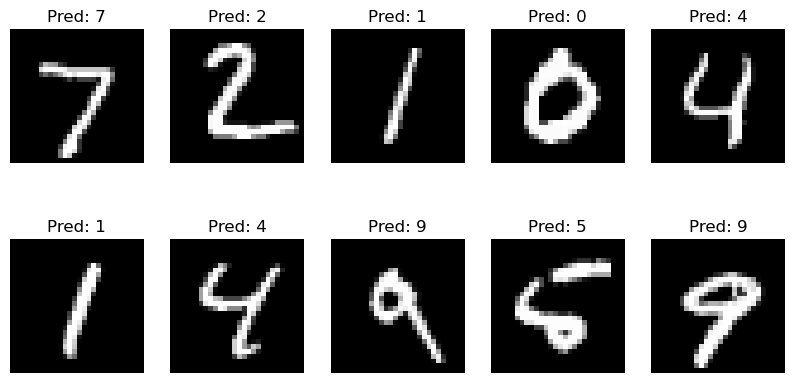

In [10]:
predictions = model.predict(x_test[:10])

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Pred: {predictions[i].argmax()}")
    plt.axis("off")
plt.show()

In [13]:
model.save("handwriting_model.keras")